In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix

# Exploratory Data Analysis

*Goal*: The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. I am analyzing the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response (Kaggle Marketing Campaign Prediction)

In [2]:
df = pd.read_csv("superstore_data.csv")

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
#Column descriptions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Income field has missing values
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
#Imbalanced outcome variable
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [7]:
#Summary Statistics
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [8]:
#Separating variables for graphing purposes 
df_num = df[['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']]

df_bar = df[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']]

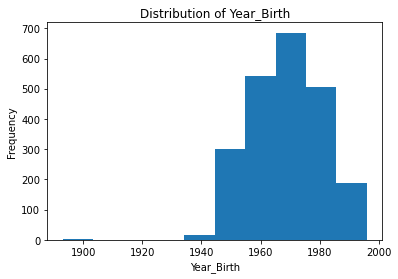

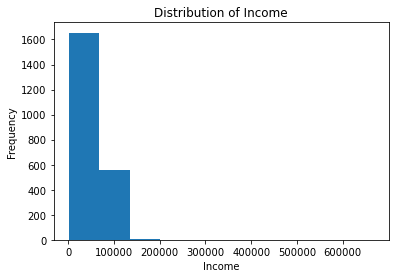

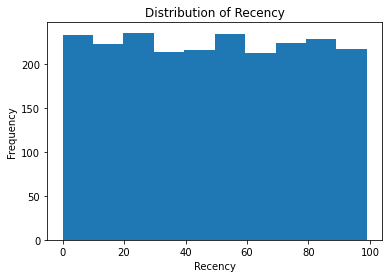

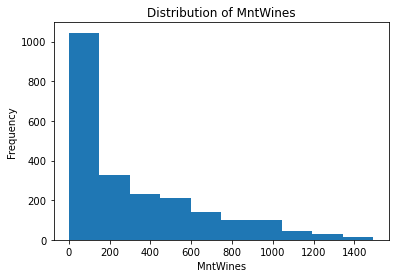

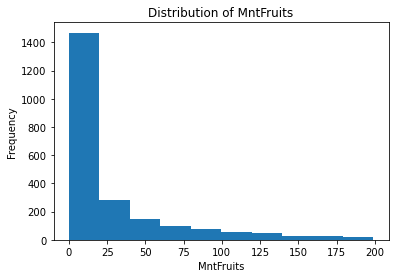

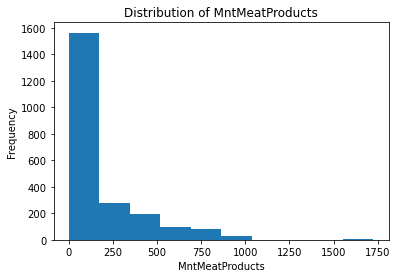

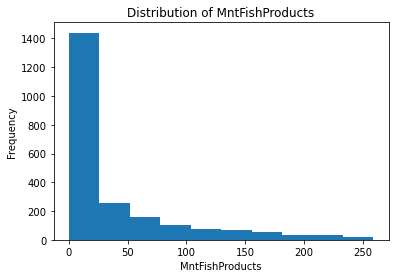

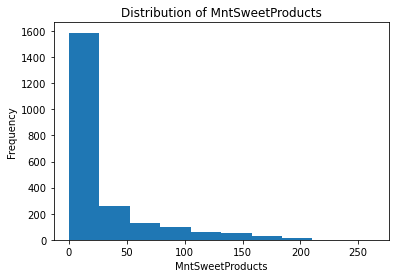

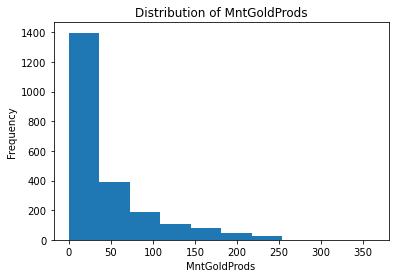

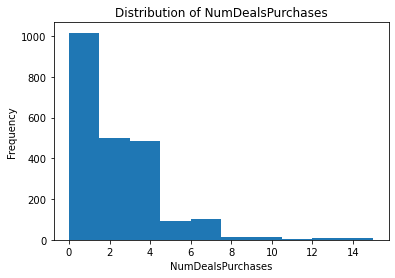

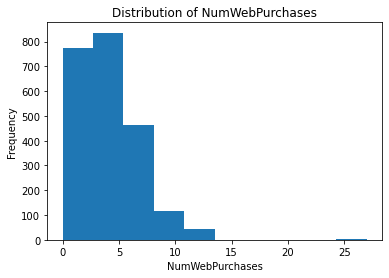

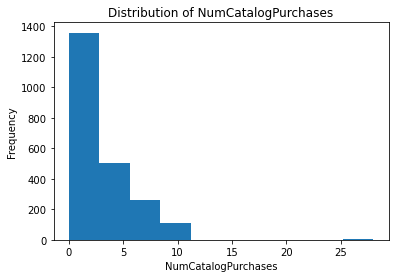

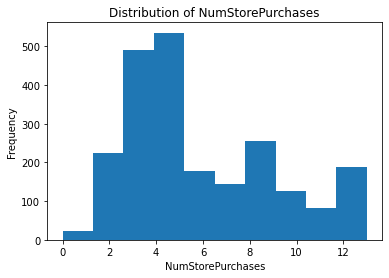

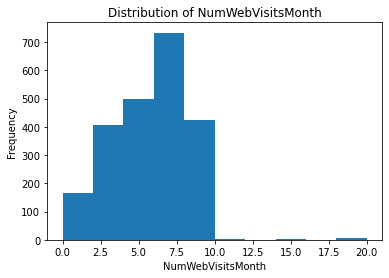

In [9]:
#Many of the distributions appear skewed to the right
for col in df_num.columns.values:
    plt.hist(df_num[col])
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.title("Distribution of " + col)
    plt.show()

<AxesSubplot:>

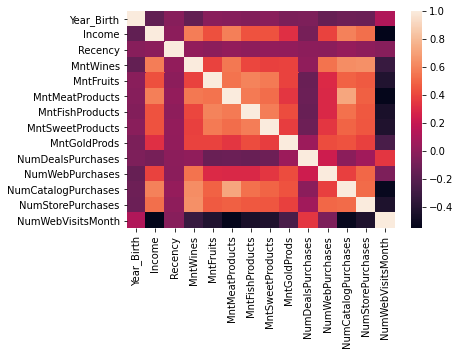

In [10]:
#Correlations between numeric variables
sns.heatmap(df_num.corr())

In [11]:
#Averages by Response type
pd.pivot_table(df, index = "Response", values = df_num.columns)

,Income,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Year_Birth
Response,,,,,,,,,,,,,,
0,50839.132767,34.980063,24.216684,40.968520,144.624344,25.035152,269.104407,2.391920,2.323190,5.736621,3.911857,5.320567,51.514690,1968.698846
1,60209.675676,52.050898,38.203593,61.446108,294.353293,38.634731,502.703593,4.203593,2.335329,6.095808,5.071856,5.293413,35.383234,1969.416168


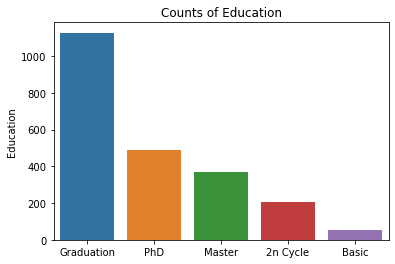

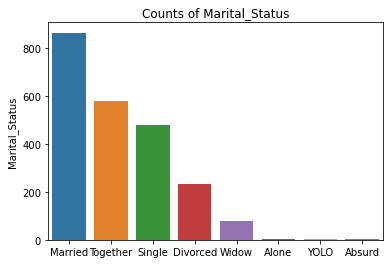

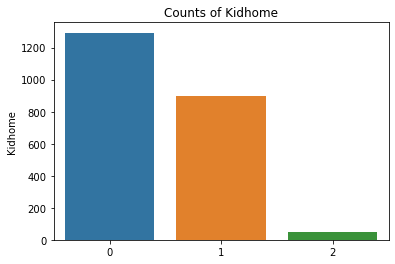

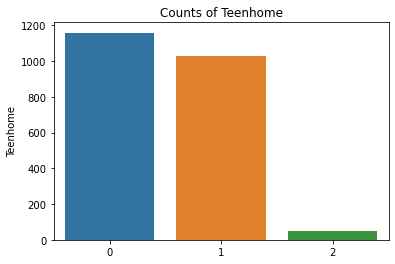

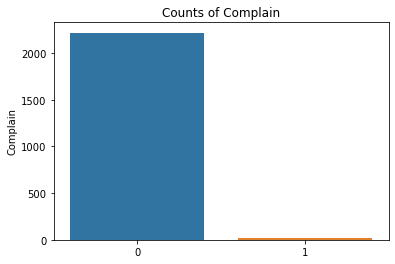

In [12]:
#Create bar graphs for columns in df_bar
for col in df_bar.columns:
    sns.barplot(x = df_bar[col].value_counts().index, y = df_bar[col].value_counts()).set_title("Counts of " + col)
    plt.show()
    

# Data Cleaning

1. Handle missing values in Income field
2. Apply one-hot encoding to categorical variables
2. Split data into training and testing sets
3. Standardize data
4. Resolve class imbalance for Response target variable 

In [13]:
#Replacing missing Income values with Iterative Imputer
imputer = IterativeImputer(random_state = 10)
df['Income'] = imputer.fit_transform(df[['Income']])
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [14]:
#One-hot encoding for categorical variables
df = pd.get_dummies(df, columns = ['Education', 'Marital_Status'], drop_first = True)
#Adding year joined field based on Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Joined'] = pd.DatetimeIndex(df["Dt_Customer"]).year

In [15]:
#Split data using train/test split
X = df.drop(columns = ['Response', 'Id', 'Dt_Customer'], axis = 1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [16]:
#Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Handle class imbalance using SMOTE
y_train.value_counts()
oversample = SMOTE()
X_train_scaled, y_train = oversample.fit_resample(X_train_scaled, y_train)

# Model Development 

In [77]:
#List containing each model
model_list = []

In [78]:
#Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
model_list.append(lr_model)

In [79]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
model_list.append(dt_model)

In [82]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
model_list.append(rf_model)

In [86]:
#KNeighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors = 20)
knn_model.fit(X_train_scaled, y_train)
model_list.append(knn_model)

# Model Results

In [87]:
def metric_calc(model_list, X_test_scaled, y_test):
    for elem in model_list:
        print(str(elem))
        model_predictions = elem.predict(X_test_scaled)
        print("Accuracy: " + str(accuracy_score(y_test, model_predictions)))
        print("AUC Score: " + str(roc_auc_score(y_test, model_predictions)))
        print(classification_report(y_test, model_predictions))

In [88]:
metric_calc(model_list, X_test_scaled, y_test)

LogisticRegression()
Accuracy: 0.7767857142857143
AUC Score: 0.7396090414071375
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       381
           1       0.37      0.69      0.48        67

    accuracy                           0.78       448
   macro avg       0.65      0.74      0.67       448
weighted avg       0.85      0.78      0.80       448

DecisionTreeClassifier()
Accuracy: 0.8147321428571429
AUC Score: 0.6819641947741606
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       381
           1       0.40      0.49      0.44        67

    accuracy                           0.81       448
   macro avg       0.65      0.68      0.67       448
weighted avg       0.83      0.81      0.82       448

RandomForestClassifier()
Accuracy: 0.8883928571428571
AUC Score: 0.7375719826066518
              precision    recall  f1-score   support

           0       0.92      0.95      0.94